<a href="https://colab.research.google.com/github/Shihab7u/Brain-Tumor-Classification-1/blob/main/CovNet_(Dataset_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install --upgrade --no-cache-dir gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1WHlR-2MmlU-ZYiDpaRPMbt7s9toO-8YiP/view?usp=sharing

Downloading...
From (original): https://drive.google.com/uc?id=1WHlR-2MmlU-ZYiDaRPMbt7s9toO-8YiP
From (redirected): https://drive.google.com/uc?id=1WHlR-2MmlU-ZYiDaRPMbt7s9toO-8YiP&confirm=t&uuid=a939dff6-0cd2-44de-a5f4-b88a3c05dddb
To: /content/Brain_Image_Data.zip
100% 91.0M/91.0M [00:02<00:00, 31.5MB/s]


In [ ]:
!unzip "/content/Brain_Image_Data.zip" > /dev/null

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.layers import Input

In [ ]:
path = os.listdir('/content/Training/')
classes = {'glioma_tumor':0, 'meningioma_tumor':1, 'no_tumor':2, 'pituitary_tumor':3}


In [ ]:
import cv2
X = []
Y = []
for cls in classes:
    pth1 = '/content/Training/'+cls
    for j in os.listdir(pth1):
        img = cv2.imread(pth1+'/'+j, 1) #0 for input shape (256,256,3) have to repalce 0 with 1
        img = cv2.resize(img, (224,224)) #256,256
        X.append(img)
        Y.append(classes[cls])

for cls in classes:
    pth2 = '/content/Testing/'+cls
    for j in os.listdir(pth2):
        img = cv2.imread(pth2+'/'+j, 1) #0 for input shape (256,256,3) have to repalce 0 with 1
        img = cv2.resize(img, (224,224)) #256,256
        X.append(img)
        Y.append(classes[cls])

In [ ]:
path = "/content/Training/"
train_data = preprocessingImages1(path)


Found 2870 images belonging to 4 classes.


In [ ]:
path = "/content/Testing/"
test_data =  preprocessingImages2(path)

Found 394 images belonging to 4 classes.


In [ ]:
X = np.array(X)
Y = np.array(Y)


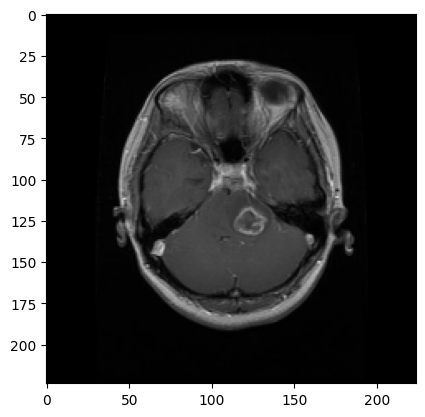

In [ ]:
plt.imshow(X[0], cmap='gray')

In [ ]:
X[0].shape

(224, 224, 3)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state=10,test_size=.20) #random_state=10

In [ ]:
xtrain.shape, xtest.shape


((2611, 224, 224, 3), (653, 224, 224, 3))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
          rotation_range = 90,
          shear_range = 0.2,
          zoom_range = 0.2,
          horizontal_flip = True,
          width_shift_range=0.1,
          height_shift_range=0.1,
          vertical_flip=True,)

datagen.fit(xtrain)

In [ ]:
#Model building starts
from tensorflow.keras.models import Model, Sequential
import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input,Bidirectional,LSTM,Lambda, GRU
from tensorflow.keras.layers import Permute,GlobalMaxPool1D,Concatenate, Dense, BatchNormalization, Dropout, GlobalAveragePooling1D, GlobalAveragePooling2D,Add
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import Dense, Activation, Flatten,MaxPooling1D,Conv1D, Conv2D,MaxPool2D,MaxPooling2D

In [ ]:
model = Sequential()


model.add(Conv2D(32, 5, activation='relu',input_shape = (224,224,3))) #3 Conv1D
model.add(MaxPooling2D(pool_size=4)) #2
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Conv2D(64, 5, activation='relu'))
model.add(Conv2D(64, 5, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(128, 5, activation='relu')) #2
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(256, 5, activation='relu')) #2
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))




model.add(Flatten())
model.add(Dense(256, activation='relu')) #128
model.add(BatchNormalization())
model.add(Dropout(0.1)) #0.3
model.add(Dense(128, activation='softmax')) #128

In [ ]:
# # plot model architecture
# from keras.utils import plot_model
# plot_model(model, show_shapes=True, to_file='CNN Architecture.png')

In [ ]:
#  model.summary()

In [ ]:
model.compile(optimizer='Adam',
            loss='sparse_categorical_crossentropy',
             metrics=["accuracy"])


In [ ]:
r=model.fit(datagen.flow(xtrain,ytrain,
			 batch_size = 32),
			 epochs = 50,
 			 verbose=1,
 			 validation_data = datagen.flow(xtest, ytest),
 			 shuffle=False
				)

Epoch 1/50
82/82 [==============================] - 19s 76ms/step - loss: 1.9901 - accuracy: 0.6626 - val_loss: 8.0902 - val_accuracy: 0.1501
Epoch 2/50
82/82 [==============================] - 5s 57ms/step - loss: 0.8886 - accuracy: 0.7871 - val_loss: 1.9464 - val_accuracy: 0.5789
Epoch 3/50
82/82 [==============================] - 4s 53ms/step - loss: 0.4671 - accuracy: 0.8606 - val_loss: 1.3430 - val_accuracy: 0.6478
Epoch 4/50
82/82 [==============================] - 4s 54ms/step - loss: 0.2962 - accuracy: 0.9027 - val_loss: 2.3785 - val_accuracy: 0.4456
Epoch 5/50
82/82 [==============================] - 5s 56ms/step - loss: 0.1620 - accuracy: 0.9510 - val_loss: 1.0902 - val_accuracy: 0.6998
Epoch 6/50
82/82 [==============================] - 4s 52ms/step - loss: 0.1094 - accuracy: 0.9640 - val_loss: 0.3173 - val_accuracy: 0.8989
Epoch 7/50
82/82 [==============================] - 4s 53ms/step - loss: 0.1013 - accuracy: 0.9667 - val_loss: 1.7138 - val_accuracy: 0.7320
Epoch 8/50
8

In [ ]:
def plot_loss_curves_mplt(history,

                          fill_a=0,
                          with_best_point=False,
                          plt_style="seaborn-v0_8-whitegrid",
                          start_epoch=1,
                          figsize = (20, 8)
                          ):

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]


    accuracy = history.history["accuracy"]

    val_accuracy = history.history["val_accuracy"]


    epochs = range(start_epoch, len(history.history["loss"])+1)

    index_loss = np.argmin(val_loss)  # This is the epoch with the lowest validation loss
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_accuracy)
    acc_highest = val_accuracy[index_acc]

    sc_label = 'Best epoch = ' + str(index_loss + start_epoch)
    vc_label = 'Best epoch = ' + str(index_acc + start_epoch)

    plt.figure(figsize=figsize, facecolor='white')
    plt.style.use(plt_style)

    # Plot loss
    plt.subplot(1, 2, 1)
    ax1 = plt.gca()  # Get the current axis
    ax1.plot(epochs, loss, '#008000', label='Training loss', linewidth=4)
    ax1.plot(epochs, val_loss,  "#FE0000", label='Validation loss', linewidth=4)
    if fill_a:
        ax1.fill_between(epochs, val_loss, loss, color='gray', alpha=fill_a)
    ax1.set_title("Training and Validation Loss", fontsize=20)
    ax1.set_xlabel("Epochs", fontsize=20)
    ax1.set_ylabel("Loss", fontsize=20)
    ax1.set_xlim([0.5, len(epochs)])
    # Plot best point
    if with_best_point:
        ax1.scatter(index_loss + start_epoch, val_lowest, s=150, c='blue', label=sc_label)
    ax1.legend(fontsize=18, loc='upper right', frameon=False)

    # Plot accuracy
    plt.subplot(1, 2, 2)
    ax2 = plt.gca()  # Get the current axis
    ax2.plot(epochs, accuracy, '#008000',  label='Training Accuracy', linewidth=4)
    ax2.plot(epochs, val_accuracy,"#FE0000", label='Validation Accuracy', linewidth=4)
    if fill_a:
        ax2.fill_between(epochs, val_accuracy, accuracy, color='gray', alpha=fill_a)
    ax2.set_title("Training and Validation Accuracy", fontsize=20)
    ax2.set_xlabel("Epochs", fontsize=20)
    ax2.set_ylabel("Accuracy", fontsize=20)
    ax2.set_xlim([0.5, len(epochs)])
    ax2.set_ylim([0, 1.1])
    # Plot best point
    if with_best_point:
        ax2.scatter(index_acc + start_epoch, acc_highest, s=150, c='blue', label=vc_label)
    ax2.legend(fontsize=18, loc='lower right', frameon=False)

    plt.tight_layout()
    plt.show()

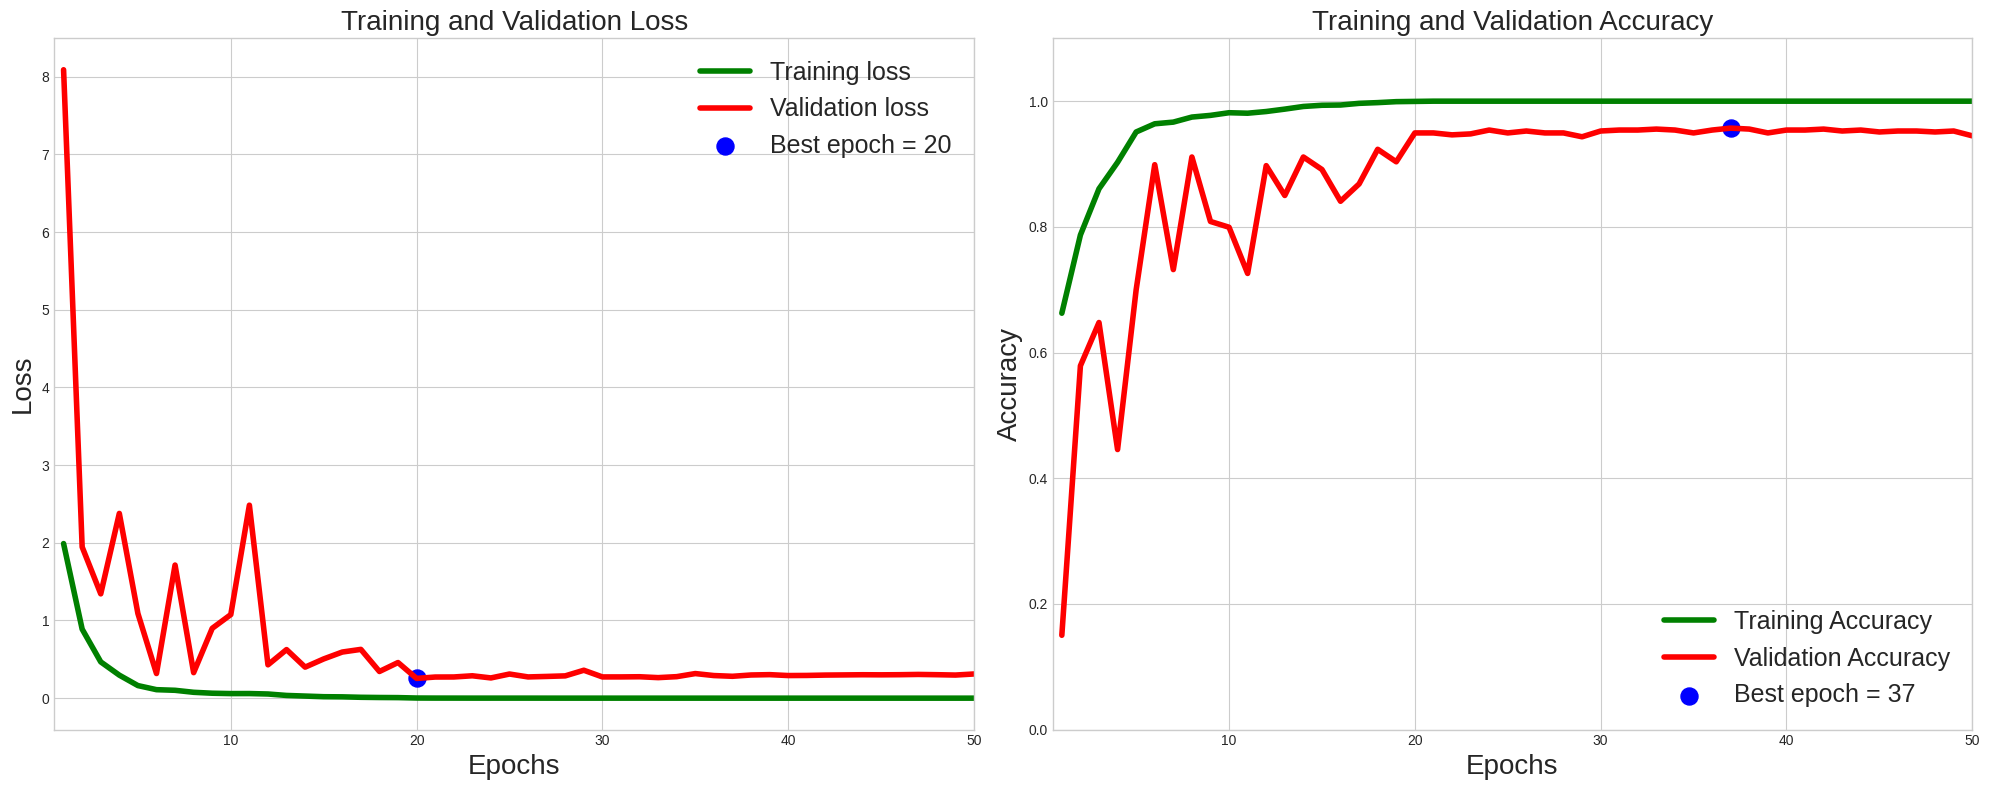

In [ ]:
plot_loss_curves_mplt(r, with_best_point=True)

In [ ]:
pred=model.predict(xtest)
Y_pred = np.argmax(pred, 1)

21/21 [==============================] - 1s 19ms/step


In [ ]:
Y_pred.shape

(653,)

In [ ]:
ytest.shape

(653,)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(ytest, Y_pred))

Confusion Matrix
[[162  16   5   1]
 [  5 196   2   2]
 [  0   4  91   0]
 [  0   1   0 168]]


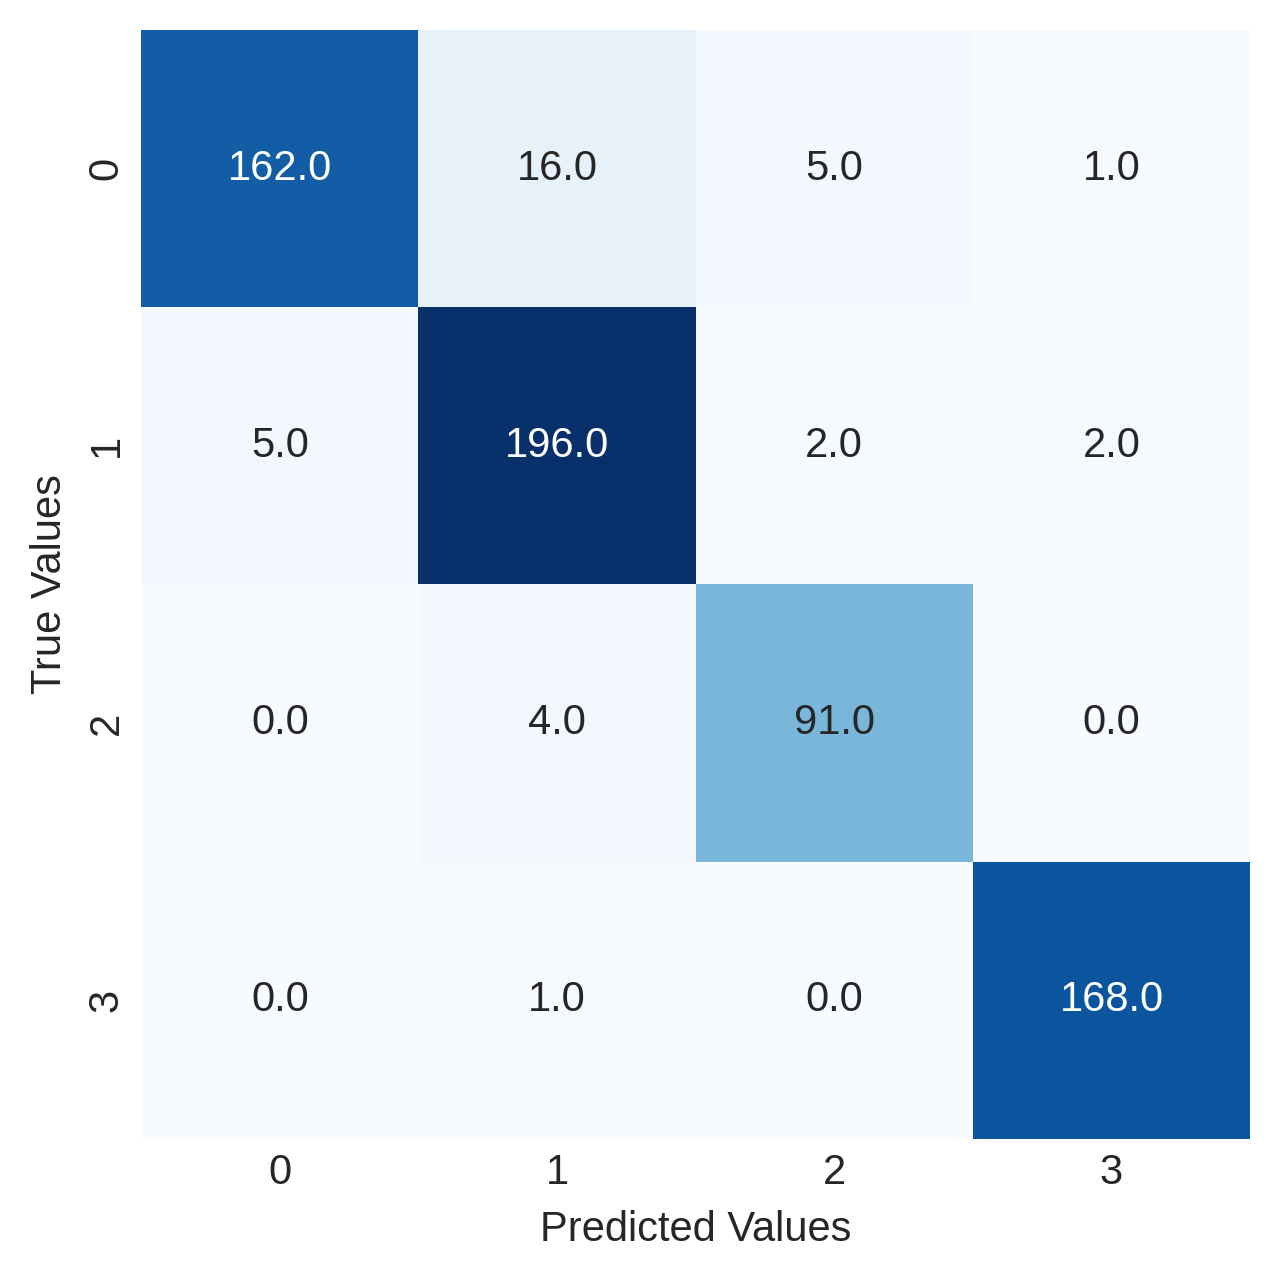

In [ ]:
import seaborn as sns
cm=confusion_matrix(ytest, Y_pred)
plt.figure(dpi=300),sns.heatmap(cm, square=True, annot=True, fmt=".1f", cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');

In [ ]:
print('Classification Report')
target_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
print(classification_report(ytest, Y_pred, target_names=target_names))

Classification Report
                  precision    recall  f1-score   support

    glioma_tumor       0.97      0.88      0.92       184
meningioma_tumor       0.90      0.96      0.93       205
        no_tumor       0.93      0.96      0.94        95
 pituitary_tumor       0.98      0.99      0.99       169

        accuracy                           0.94       653
       macro avg       0.95      0.95      0.95       653
    weighted avg       0.95      0.94      0.94       653



In [ ]:
print(ytrain)

[3 1 0 ... 0 3 1]


[Text(0, 0.5, 'glioma'),
 Text(0, 1.5, 'meningioma'),
 Text(0, 2.5, 'no_tumor'),
 Text(0, 3.5, 'pituitary')]

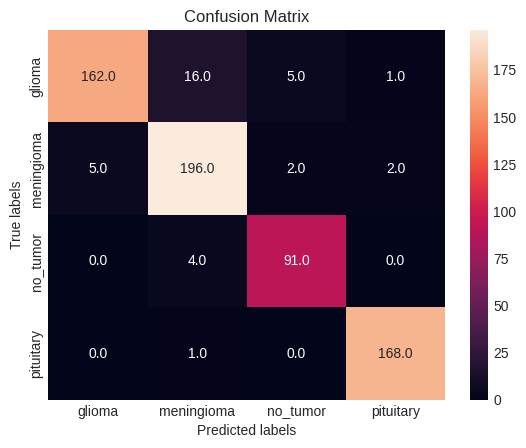

<Figure size 1920x1440 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


ax= plt.subplot()
plt.figure(dpi=300),sns.heatmap(cm, annot=True, ax = ax, fmt=".1f"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['glioma', 'meningioma', 'no_tumor', 'pituitary']); ax.yaxis.set_ticklabels(['glioma', 'meningioma', 'no_tumor', 'pituitary'])


Confusion Matrix :
[[162  16   5   1]
 [  5 196   2   2]
 [  0   4  91   0]
 [  0   1   0 168]]
Accuracy Score : 0.9448698315467075
Report : 
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       184
           1       0.90      0.96      0.93       205
           2       0.93      0.96      0.94        95
           3       0.98      0.99      0.99       169

    accuracy                           0.94       653
   macro avg       0.95      0.95      0.95       653
weighted avg       0.95      0.94      0.94       653



(<Figure size 1920x1440 with 2 Axes>, <Axes: >)

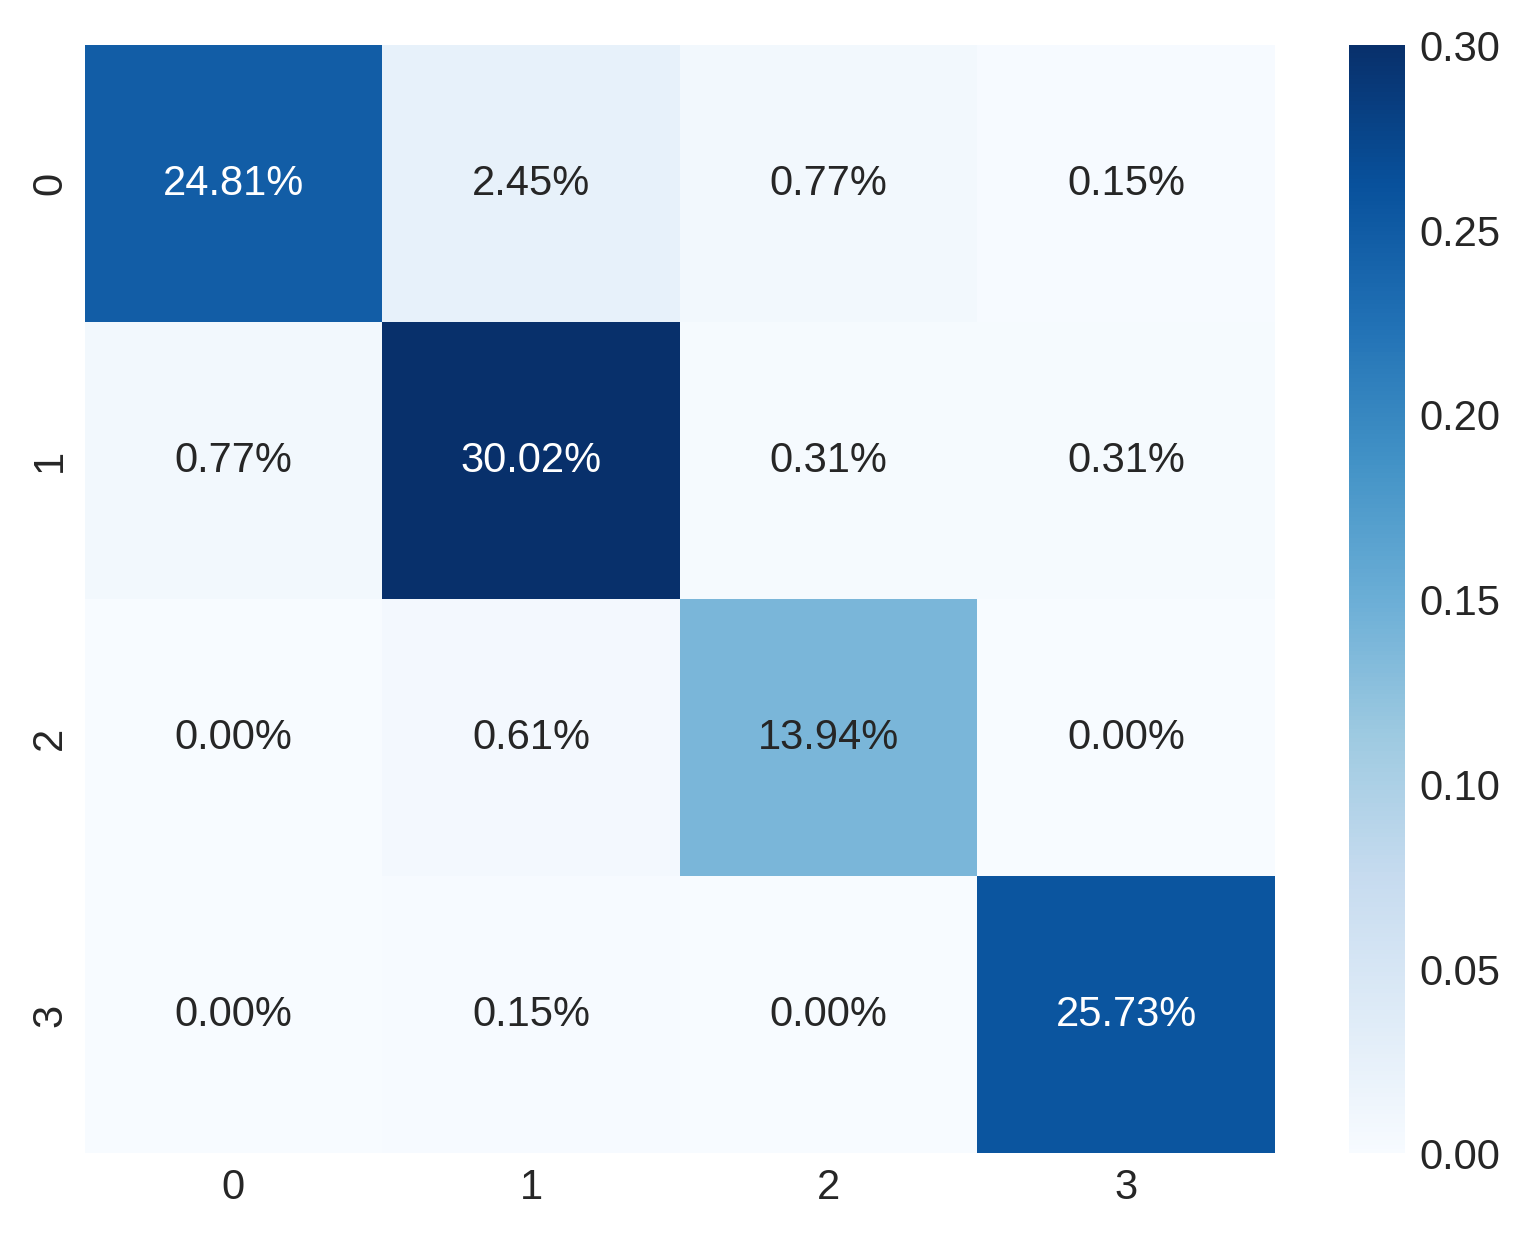

In [ ]:
from sklearn.metrics import accuracy_score
results = confusion_matrix(ytest,Y_pred)
print('Confusion Matrix :')
print(results)
print('Accuracy Score :',accuracy_score(ytest,Y_pred))
print('Report : ')
print(classification_report(ytest,Y_pred))

plt.figure(dpi=300),sns.heatmap(results/np.sum(results), annot=True,
            fmt='.2%', cmap='Blues')


In [ ]:
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(ytest, Y_pred, pos_label=3)
metrics.auc(fpr, tpr)

0.9943640275808108

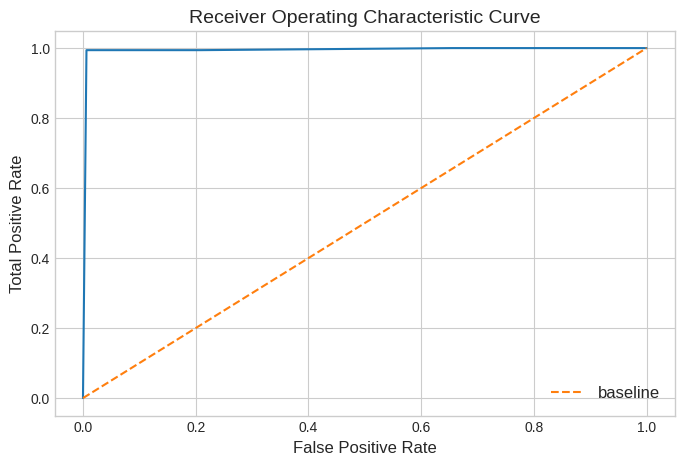

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(fpr, tpr)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=14)
plt.ylabel('Total Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.legend(fontsize=12);